In [5]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import time

# Applied Math 10: Computing for Science and Engineering
<br>

## Lab 7 : Elementary - First-order Ordinary Differential Equations (ODEs)

**Spring 2020**<br/>
<br>
**Instructor**: K. Indireshkumar (Kumar)<br/>
**Material**: K. Indireshkumar (Kumar)

### Learning Goals of Lab 
In this lab, we continue the work started in Lecture 7. Our objective in this lab is to:

- explore the Runge-Kutta methods
- write Python functions for all the methods of solving first order ODEs discussed in the class
- solve a few ODEs 

## Functions for Euler and modified Euler methods

We will start by writing functions for all the methods discussed in lecture 7 generalizing the methods to a broader class of functions, i.e.
$$ \frac{du}{dx} = f(x,u) $$

where $f(x,u)$ can be changed without modifying the core of the integration routine. 

### Function for the Euler method:

From Lecture 7, we note that:
$$ 
u(x_{n+1}) = u(x_n) + \Delta x \cdot f(u(x_n), x_n)$$

**Exercise 1: Fill in the missing code in the function for the Euler method**

In [6]:
def euler(Nx, xmin, xmax, uf0):
    #Diff eqn of form: d(uf)/dx=ff(x,uf) 
    #Nx: Number of points to be used for integration
    #xmin, xmax: Initial and final values of the independent variable (x)
    #uf0: Initial value of the dependent variable at x=xmin
    
    #Assume the function f(u,x) is of form:
    
    #ff(x[n], uf[n])
    
    #For any function f(u,x) on the RHS, you need to provide
    #a python function. For example, for the eigenfunction problem:
    
    #def ff(x, y):
    #    a=2.0
    #    dydx = a * y
    #    return dydx
    
    #Define x
    x = np.linspace(xmin, xmax, Nx)
    #Calculate dx
    dx = x[1] - x[0]
    #Set up the array for ux
    uf = np.zeros(Nx)
    #Define the initial condition
    uf[0] = uf0
    #We need to write another function ff(x[n],uf[n])
    #for the integrand. We will do it later when we need to
    #solve the equation for particular cases.
    for n in range(0, Nx - 1):
        #Fill in the code for uf[n+1]
        '''--------------------------------------'''
        uf[n+1] = uf[n] + dx * ff(x[n], uf[n])
        '''--------------------------------------'''
        
    return uf

### Function for the modified-Euler method
Again the formula for the modified-Euler method is:
$$u_{n+1} = u_n + \frac{1}{2} \Delta x \left \{ f(x_n, u_n) + f(x_{n+1}, u_n+\Delta x \cdot f(x_n, u_n) ) \right \}$$

**Exercise 2: Fill in the missing code in the function for the modified-Euler method**

In [7]:
def mod_euler(Nx, xmin, xmax, uf0):
    #Diff eqn of form: d(uf)/dx=ff(x,uf)
    #Nx: Number of points to be used for integration
    #xmin, xmax: Initial and final values of the independent variable (x)
    #uf0: Initial value of the dependent variable at x=xmin
     
    #Define x
    x = np.linspace(xmin, xmax, Nx)
    #Determine dx
    dx = x[1] - x[0]
    #Set up the array for ux and initialize it to zero
    uf = np.zeros(Nx)
    #Specify the boundary (initial) condition at x=xmin
    uf[0] = uf0

    for n in range(Nx - 1):
        # uf[n+1] is of the form: uf[n+1] = uf[n] + 0.5 * dx * (ff1 + ff2)
        '''Write in the code for ff1 and ff2'''
        '''--------------------------------------'''
        ff1 = ff(x[n], uf[n])
        ff2 = ff(x[n+1], (uf[n] + (dx * ff1)))
        '''-------------------------------------------'''
        uf[n+1] = uf[n] + 0.5 * dx * (ff1 + ff2)
    return uf

## Problem 1

Solve the problem:

$$ \frac{du}{dx} = a u $$

over the domain $0 \le x \le 3$. Here, $a=-50.0$ and $u(0)=1.0$.

Try Nx=100. Use the functions you wrote for Euler and  modified-Euler methods. Plot the solutions.

The solution has two parts:
- Define the function to calculate RHS of ODE
- Call the functions for Euler and modified-Euler methods you have completed.

In [8]:
#Define the function (RHS of ODE)
# (RHS of the differential equation -- f(x,u))
def ff(x,u):
    a=-50.0
    #a=2.0 uncommenting this gives the same equation as in class.
    '''---complete the function for the eigenfunction problem-------'''
    dudx = a * u
    return dudx
    '''---------------------------------------------------------'''

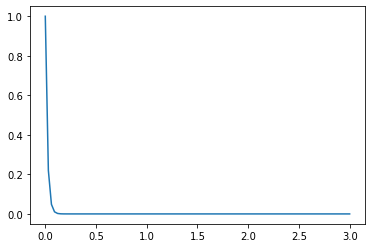

In [13]:
#Exact solution 
# No need to fill in anything. Study carefully.

#Parameters

# a below should be the same as in the function
a=-50.0 
#a=2.0 ## uncommenting this will give  you the same
       ## problem as in class. 

Afact=1.0
Nx=100
xmin=0.0
xmax=3.0

#Setup x 
x = np.linspace(xmin, xmax, Nx)

#Calculate the exact solution
utrue = Afact * np.exp(a * x)

#Plot exact solution u(x)
plt.plot(x, utrue)

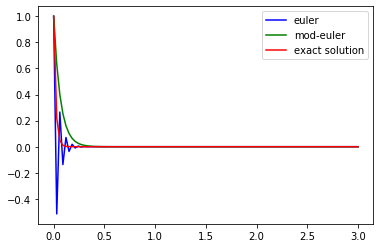

In [14]:
# Apply Euler's and modified-Euler's methods to the eigenfunction problem

#define the initial value uf0
'''-----------------------------'''
uf0 = Afact
'''----------------------------'''

#call the functions.
#(uf1 is for Euler and uf2 is for modified-Euler)
'''--------------------------------------'''
uf1 = euler(Nx, xmin, xmax, uf0)
uf2 = mod_euler(Nx, xmin, xmax, uf0)
'''--------------------------------------'''

plt.plot(x, uf1, 'b-',label="euler")
plt.plot(x, uf2, 'g-',label="mod-euler")

plt.plot(x, utrue, 'r-', label="exact solution")
plt.legend()
plt.show()


### Function for the second-order RK method

$$k^{(1)}_n = f(x_n,u_n), \; \; \; 
k^{(2)}_n=f(x_n+\frac{h}{2},u_n+\frac{h k^{(1)}_n}{2} ), \; \; \; 
k^{(3)}_n = f(x_n+h,u_n+h k^{(2)}_n)
$$ 

$$u_{n+1} = u_n + \frac{h}{4} \left [ k^{(1)}_n + 2 \; k^{(2)}_n + k^{(3)}_n 
\right ] $$

In [16]:
def runge_kutta2(Nx, xmin, xmax, uf0):
    #Diff eqn of form: d(uf)/dx=ff(x,uf)
    #Nx: Number of points to be used for integration
    #xmin, xmax: Initial and final values of the independent variable (x)
    #uf0: Initial value of the dependent variable at x=xmin
    
    #Define x
    x = np.linspace(xmin, xmax, Nx)
    #Find dx
    dx = x[1] - x[0]
    #Set up the array for uf
    uf = np.zeros(Nx)
    #Specify the boundary (or initial) condition for uf.
    uf[0] = uf0
    
    #We define two variables that minimize the repetitive computations
    
    dxovr4 = dx * 0.25
    dxovr2 = dx * 0.5

    for n in range(Nx - 1):
        #Write in the code for kn1, kn2, and kn3 
        '''---------------------------------------'''
        kn1 = ff(x[n], uf[n])
        kn2 = ff(x[n] + dxovr2, uf[n] + dxovr2 * kn1)
        kn3 = ff(x[n] + dx, uf[n] + dx * kn2)
        
        '''----------------------------------------'''
        uf[n+1] = uf[n] + dxovr4 * (kn1 + 2.0 * kn2 + kn3)
    return uf

### Function for the fourth-order RK method 

Fourth order RK is given by:

$$k^{(1)}_n = f(x_n,u_n), \; \; \; 
k^{(2)}_n=f(x_n+\frac{h}{2},u_n+\frac{h k^{(1)}_n}{2} ), \; \; \; 
k^{(3)}_n=f(x_n+\frac{h}{2},u_n+\frac{h k^{(2)}_n}{2} ), \; \; \; 
k^{(4)}_n = f(x_n+h,u_n+h k^{(3)}_n)
$$ 

$$u_{n+1} = u_n + \frac{h}{6} \left [ k^{(1)}_n + 2 \; k^{(2)}_n + 2 \; k^{(3)}_n + k^{(4)}_n 
\right ] $$


In [17]:
def runge_kutta4(Nx, xmin, xmax, uf0):
    #Diff eqn of form: d(uf)/dx=ff(x,uf)
    #Nx: Number of points to be used for integration
    #xmin, xmax: Initial and final values of the independent variable (x)
    #uf0: Initial value of the dependent variable at x=xmin
    
    #Set up x
    x = np.linspace(xmin, xmax, Nx)
    #Determine dx
    dx = x[1] - x[0]
    #Set up the array for uf
    uf = np.zeros(Nx)
    #Initialize uf
    uf[0] = uf0
    
    #We define two variables that minimize the repetitive computations
    
    dxovr6 = dx / 6.0
    dxovr2 = dx * 0.5

    for n in range(Nx - 1):
      #Fill in the expressions for kn1, kn2, kn3, and kn4
        '''-------------------------------------'''
        kn1 = ff(x[n], uf[n])
        kn2 = ff(x[n] + dxovr2, uf[n] + dxovr2 * kn1)
        kn3 = ff(x[n] + dxovr2, uf[n] + dxovr2 * kn2)
        kn4 = ff(x[n] + dx, uf[n] + dx * kn3)
        
        '''-------------------------------------'''
        uf[n+1] = uf[n] + dxovr6 * (kn1 + 2.0 * kn2 + 2.0 * kn3 + kn4)
    return uf

## Problem 1 (continued)

Solve problem 1 with Runge-Kutta 2nd order (RK2) and 4th order (RK4) methods

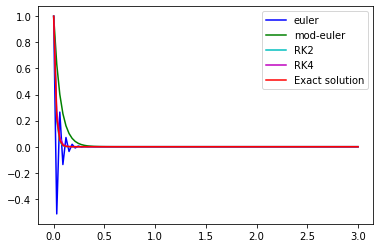

In [19]:
#Solution for problem 1 with Runge-Kutta :

#Call the functions for RK2 and RK4 and store them in
#uf3 and uf4
'''---------------------------'''
uf3 = runge_kutta2(Nx, xmin, xmax, uf0)
uf4 = runge_kutta4(Nx, xmin, xmax, uf0)

'''---------------------------'''
plt.plot(x, uf1, 'b-',label="euler")
plt.plot(x, uf2, 'g-',label="mod-euler")
plt.plot(x, uf3, 'c-',label="RK2")
plt.plot(x, uf4, 'm-',label="RK4")

plt.plot(x, utrue, 'r-', label='Exact solution')
plt.legend()
plt.show()

## Problem 2

Solve the following ODE:

\begin{equation}
\frac{dn}{dt} = rn(1-\frac{n}{N}) \hspace{6cm} (1)
\end{equation}

over the domain $0 \le t \le 30$. Here,  $r=0.5$, $N=10$, and $n(t=0)=n_0=0.001$.
Plot the solutions and compare them to the exact solution (see below)  with Runge-Kutta 4th order method.

   This problem has the exact solution:
   \begin{equation}
    n(t)=\frac{N}{1+\left[\frac{N}{n_0}-1\right]e^{-rt}} \hspace{6cm} (2)
   \end{equation}
   

### Steps involved:

- The steps involved are the same as in the eigen-function problem (i.e. Problem 1)
- You need to define the function, i.e. RHS of the ODE
- You need to code the exact solution, which is given above. Carefully note all the parameters: r, N, xmin, xmax, initial value. These need to be defined
- Specify the initial value, i.e. n at t=0
- Compute the solution by calling RK4


In [52]:
#Define the function (RHS of ODE)
# (RHS of the differential equation -- f(x,u))
def ff(x,u):
    r = 0.5
    Nconst = 10
    #a=2.0 uncommenting this gives the same equation as in class.
    '''---complete the function for the eigenfunction problem-------'''
    dudx = r * u * (1 - (u / Nconst))
    return dudx
    '''---------------------------------------------------------'''

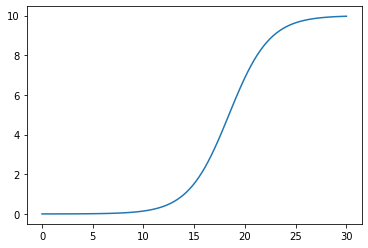

In [55]:
#Exact solution 
# No need to fill in anything. Study carefully.

#Parameters

# a below should be the same as in the function
r = 0.5
Nconst = 10
#a=2.0 ## uncommenting this will give  you the same
       ## problem as in class. 
    
Nx=100
xmin=0.
xmax=30.

#Setup x 
x = np.linspace(xmin, xmax, Nx)

#Setup nf array
uf = np.zeros(Nx)
uf0 = 0.001


#Calculate the exact solution
utrue = Nconst / (1 + (((Nconst/uf0)-1) * np.exp(-r*x)))
                  
#Plot exact solution u(x)
plt.plot(x, utrue)

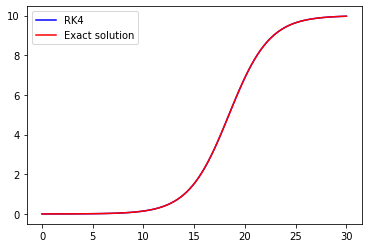

In [56]:
#Solution for problem 1 with Runge-Kutta :

#Call the functions for RK2 and RK4 and store them in 
#uf4
'''---------------------------'''
uf4 = runge_kutta4(Nx, xmin, xmax,uf0)

'''---------------------------'''
plt.plot(x, uf4, 'b-',label="RK4")

plt.plot(x, utrue, 'r-', label='Exact solution')
plt.legend()
plt.show()